In [ ]:
unsupervised ML dataset::no target column dataset::

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [5]:
sns=pd.read_csv(r"E:\Python Dataset\snsdata.csv")

In [7]:
sns.head()

gradeyear gender     age  friends  basketball  football  soccer  softball  \
0       2006      M  18.982        7           0         0       0         0   
1       2006      F  18.801        0           0         1       0         0   
2       2006      M  18.335       69           0         1       0         0   
3       2006      F  18.875        0           0         0       0         0   
4       2006    NaN  18.995       10           0         0       0         0   

   volleyball  swimming  ...  blonde  mall  shopping  clothes  hollister  \
0           0         0  ...       0     0         0        0          0   
1           0         0  ...       0     1         0        0          0   
2           0         0  ...       0     0         0        0          0   
3           0         0  ...       0     0         0        0          0   
4           0         0  ...       0     0         2        0          0   

   abercrombie  die  death  drunk  drugs  
0            0    0      0      0      0  
1            0    0      0      0      0  
2            0    0      1      0      0  
3            0    0      0      0      0  
4            0    0      0      1      1  

[5 rows x 40 columns]

In [9]:
sns.shape

(30000, 40)

In [15]:
sns.isnull().sum()

gradeyear          0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [11]:
sns.gender.value_counts()

gender
F    22054
M     5222
Name: count, dtype: int64

In [25]:
sns.gender.replace({"F":0,"M":1},inplace=True)

In [27]:
sns.gender.value_counts()

gender
0    22054
1     5222
1     2724
Name: count, dtype: int64

In [13]:
sns.gender=sns.gender.fillna("1")

In [17]:
sns.age=sns.age.fillna(sns.age.median())

In [19]:
from sklearn.cluster import KMeans
sns_kmeans=KMeans(n_clusters=3)

In [29]:
sns_kmeans.fit(sns)

KMeans(n_clusters=3)

In [31]:
sns_kmeans.cluster_centers_

array([[2.00745098e+03, 2.88888889e-01, 1.79272211e+01, 1.05059004e+01,
        2.38978289e-01, 2.35453384e-01, 2.04750958e-01, 1.28275862e-01,
        1.23780332e-01, 1.22452107e-01, 9.27713921e-02, 9.72669221e-02,
        8.34738186e-02, 1.32669221e-01, 2.87458493e-01, 2.07203065e-01,
        1.32158365e-01, 1.14431673e-01, 9.67560664e-02, 3.84674330e-01,
        2.85006386e-01, 3.65772669e-02, 7.14993614e-01, 2.32286079e-01,
        4.20280971e-01, 2.13180077e-01, 9.77777778e-02, 1.99233716e-02,
        4.00715198e-01, 9.87994891e-02, 8.05108557e-02, 2.26973180e-01,
        3.12132822e-01, 1.40536398e-01, 5.59897829e-02, 4.15836526e-02,
        1.78441890e-01, 1.06513410e-01, 8.48531290e-02, 6.16602810e-02],
       [2.00768027e+03, 1.75510204e-01, 1.75979109e+01, 1.40329252e+02,
        3.80952381e-01, 2.91836735e-01, 2.44897959e-01, 2.54421769e-01,
        1.99319728e-01, 1.53741497e-01, 2.02040816e-01, 1.36734694e-01,
        9.25170068e-02, 1.42176871e-01, 4.75510204e-01, 2.28571

In [35]:
l1=list(sns_kmeans.labels_)

In [37]:
len(l1)

30000

In [41]:
sns_kmeans.fit(sns).score(sns)#ssd

-17292786.25513305

In [49]:
nc=range(1,10)
kmeans=[KMeans(n_clusters=i)for i in nc]
kmeans
score=[kmeans[i].fit(sns).score(sns)for i in range(len(kmeans))]
print(score)

[-42278614.20606327, -18618402.90907534, -11302300.535809996, -8113683.9713785015, -6358833.500844656, -5265227.175645705, -4098284.5350380717, -3398989.47261637, -2558994.1410468873]


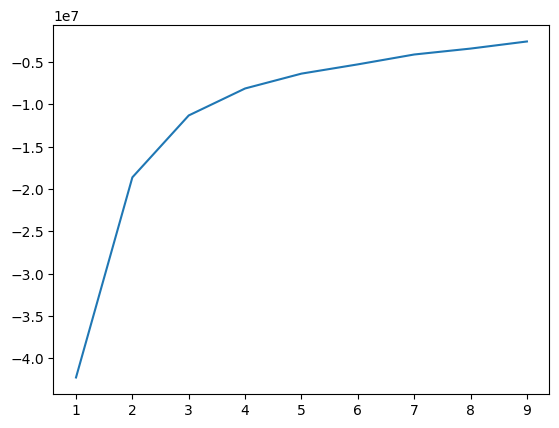

In [53]:
plt.plot(nc,score)

In [55]:
score1=np.absolute(score)
score1

array([42278614.20606327, 18618402.90907534, 11302300.53581   ,
        8113683.9713785 ,  6358833.50084466,  5265227.17564571,
        4098284.53503807,  3398989.47261637,  2558994.14104689])

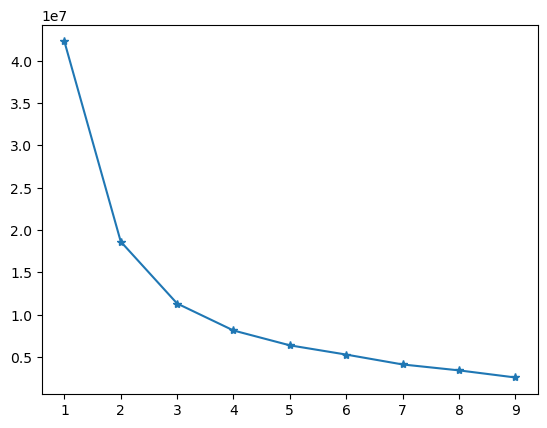

In [57]:
plt.plot(nc,score1,marker="*")

In [65]:
cluster=pd.concat([sns,pd.Series(sns_kmeans.labels_)],axis=1)
cluster.head(10)

gradeyear gender     age  friends  basketball  football  soccer  softball  \
0       2006      1  18.982        7           0         0       0         0   
1       2006      0  18.801        0           0         1       0         0   
2       2006      1  18.335       69           0         1       0         0   
3       2006      0  18.875        0           0         0       0         0   
4       2006      1  18.995       10           0         0       0         0   
5       2006      0  17.287      142           0         0       0         0   
6       2006      0  18.930       72           0         0       0         0   
7       2006      1  18.322       17           0         0       0         1   
8       2006      0  19.055       52           0         0       0         0   
9       2006      0  18.708       39           0         0       0         0   

   volleyball  swimming  ...  mall  shopping  clothes  hollister  abercrombie  \
0           0         0  ...     0         0        0          0            0   
1           0         0  ...     1         0        0          0            0   
2           0         0  ...     0         0        0          0            0   
3           0         0  ...     0         0        0          0            0   
4           0         0  ...     0         2        0          0            0   
5           0         0  ...     0         1        0          0            0   
6           0         0  ...     2         0        0          2            0   
7           0         0  ...     0         0        0          0            0   
8           0         0  ...     0         0        0          0            0   
9           0         0  ...     0         1        0          0            0   

   die  death  drunk  drugs  0  
0    0      0      0      0  1  
1    0      0      0      0  1  
2    0      1      0      0  2  
3    0      0      0      0  1  
4    0      0      1      1  1  
5    0      0      1      0  2  
6    0      0      0      0  2  
7    0      0      0      0  1  
8    0      0      0      0  1  
9    0      0      0      0  1  

[10 rows x 41 columns]

In [73]:
cluster.rename(columns={cluster.columns[40]:"Cluster_number"},inplace=True)
cluster

gradeyear gender     age  friends  basketball  football  soccer  \
0           2006      1  18.982        7           0         0       0   
1           2006      0  18.801        0           0         1       0   
2           2006      1  18.335       69           0         1       0   
3           2006      0  18.875        0           0         0       0   
4           2006      1  18.995       10           0         0       0   
...          ...    ...     ...      ...         ...       ...     ...   
29995       2009      1  16.115        0           0         0       0   
29996       2009      1  15.792        1           0         1       0   
29997       2009      1  15.784        0           0         1       0   
29998       2009      1  16.378        0           0         0       0   
29999       2009      0  18.724        3           2         0       0   

       softball  volleyball  swimming  ...  mall  shopping  clothes  \
0             0           0         0  ...     0         0        0   
1             0           0         0  ...     1         0        0   
2             0           0         0  ...     0         0        0   
3             0           0         0  ...     0         0        0   
4             0           0         0  ...     0         2        0   
...         ...         ...       ...  ...   ...       ...      ...   
29995         0           0         0  ...     0         0        0   
29996         0           0         0  ...     0         0        0   
29997         0           0         0  ...     0         0        0   
29998         0           0         0  ...     0         0        0   
29999         1           0         0  ...     0         0        0   

       hollister  abercrombie  die  death  drunk  drugs  Cluster_number  
0              0            0    0      0      0      0               1  
1              0            0    0      0      0      0               1  
2              0            0    0      1      0      0               2  
3              0            0    0      0      0      0               1  
4              0            0    0      0      1      1               1  
...          ...          ...  ...    ...    ...    ...             ...  
29995          0            0    0      0      0      0               1  
29996          0            0    0      0      0      0               1  
29997          0            0    0      0      0      0               1  
29998          0            0    0      0      0      0               1  
29999          0            0    0      0      0      0               1  

[30000 rows x 41 columns]

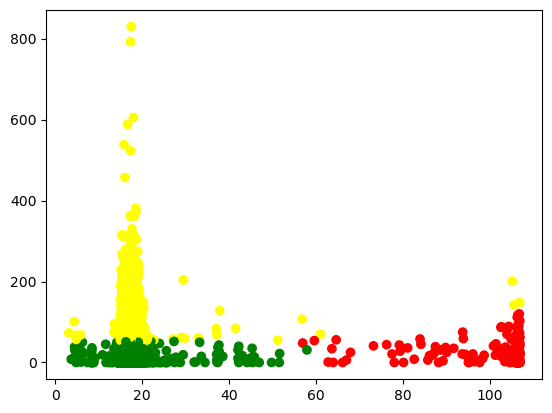

In [85]:
colormap=np.array(["Red","Green","Yellow"])
plt.scatter(sns.age,sns.friends,c=colormap[sns_kmeans.labels_])
plt.show()